In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [68]:
ctr=pd.read_csv('C:\CTR_Prediction\ctr.csv')

#### Issues with Dataset and Solution

1. Dirty Data
- **`Daily Time Spent on Site->`** 
    - Zero null value
    - Convert datatype into float32
    - Not Normal Distribution

- **`Age`**
    - Zero null value
    - Convert datatype into int32
    - Almost Normal Ditribution

- **`Area Income`**
    - Zero null value
    - almost normal distribution

- **`Daily Internet Usage`**
    - Zero null value
    - almost normal distribution
    
- **`Ad Topic Line`**
    - Zero null value
    - there is 50 sub categores more dominate to other sub categories are less dominate
    - we will drop this atttribute bcz here 559 different vategories and it will not play a important role for prediction
    
    
- **`Gender`**
    - zero null value
    - `53.76%` Female and `46.24%` Male `Balanced gender Attribute`
    

- **`Click on Ad`**
    - Zero null value
    - `50.83%` -> 0 and `49.17%` -> 1 `balanced click on ad attribute`



2. Messay Data

- **`Duplicate`** Drop duplicate values
- **`Transformation and scaling`**
    - **`Daily Time Spent on Site`,`Age`,`Area of Income`,`Daily Internet Usage`:-** we apply here Scaling or Transformatkion
- **`Timestamp`** Month extract from timestamp attribute and drop timestamp attribute
- **`Gender` ,`Timestamp_month`** onehotencoding apply convert into numerical 

In [69]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  int64  
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 781.4+ KB


In [70]:
ctr['Age']=ctr['Age'].astype('int32')

In [71]:
# month extract from timestamp


ctr['Timestamp']=pd.to_datetime(ctr['Timestamp'])
ctr['Timestamp_month']=ctr['Timestamp'].dt.month_name()
ctr['Timestamp_date']=ctr['Timestamp'].dt.day
ctr['date']=ctr['Timestamp'].dt.date

In [72]:
# ctr.drop('Timestamp',inplace=True,axis=1)

In [73]:
ctr

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Timestamp_month,Timestamp_date,date
0,62.26,32,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:00,0,June,9,2016-06-09
1,41.73,31,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:00,0,January,16,2016-01-16
2,44.40,30,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:00,0,June,29,2016-06-29
3,59.88,28,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:00,0,June,21,2016-06-21
4,49.21,30,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:00,1,July,21,2016-07-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,41.73,31,61840.26,207.17,Profound executive flexibility,West Angelabury,Male,Singapore,2016-01-03 03:22:00,1,January,3,2016-01-03
9996,41.73,28,51501.38,120.49,Managed zero tolerance concept,Kennedyfurt,Male,Luxembourg,2016-05-28 12:20:00,0,May,28,2016-05-28
9997,55.60,39,38067.08,124.44,Intuitive exuding service-desk,North Randy,Female,Egypt,2016-01-05 11:53:00,0,January,5,2016-01-05
9998,46.61,50,43974.49,123.13,Realigned content-based leverage,North Samantha,Female,Malawi,2016-04-04 07:07:00,1,April,4,2016-04-04


In [74]:
ctr['Timestamp_date']

0        9
1       16
2       29
3       21
4       21
        ..
9995     3
9996    28
9997     5
9998     4
9999     3
Name: Timestamp_date, Length: 10000, dtype: int32

In [75]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  10000 non-null  float64       
 1   Age                       10000 non-null  int32         
 2   Area Income               10000 non-null  float64       
 3   Daily Internet Usage      10000 non-null  float64       
 4   Ad Topic Line             10000 non-null  object        
 5   City                      10000 non-null  object        
 6   Gender                    10000 non-null  object        
 7   Country                   10000 non-null  object        
 8   Timestamp                 10000 non-null  datetime64[ns]
 9   Clicked on Ad             10000 non-null  int64         
 10  Timestamp_month           10000 non-null  object        
 11  Timestamp_date            10000 non-null  int32         
 12  date               

In [76]:
# balanced dataset
cout=pd.DataFrame(ctr['Clicked on Ad'].value_counts()/len(ctr['Clicked on Ad'])*100)
cout.rename(columns={'count':'Data percentage'},inplace=True)
cout

,Data percentage
Clicked on Ad,
0,50.83
1,49.17


- **Here balanced dataset it will good for model training and prediction.**
- **Both dataset are almost equal divided**

In [77]:
#categorical data
cat_ctr=['Ad Topic Line', 'City', 'Gender', 'Country','Timestamp_month']
#numerical data
num_ctr=['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage','Timestamp_date']

- **`cat_ctr` identife a different kinds of categorical attribute and apply descriptive statistics**
- **`num_cat` identife a diffenent kinds of numerical attribute and apply descriptive statistics**

In [78]:
ctr[num_ctr].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Timestamp_date
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831,14.324900
std,15.704142,8.572973,13343.708718,40.820951,8.616401
min,32.600000,19.000000,13996.500000,105.220000,1.000000
25%,48.860000,29.000000,44052.302500,140.150000,7.000000
50%,59.590000,35.000000,56180.930000,178.920000,13.000000
75%,76.580000,42.000000,61840.260000,212.670000,21.000000
max,90.970000,60.000000,79332.330000,269.960000,31.000000


In [79]:
ctr[cat_ctr].describe()

,Ad Topic Line,City,Gender,Country,Timestamp_month
count,10000,10000,10000,10000,10000
unique,559,521,2,207,7
top,Cloned explicit middleware,Hubbardmouth,Female,Australia,April
freq,344,336,5376,388,1734


<Axes: xlabel='Daily Internet Usage', ylabel='Count'>

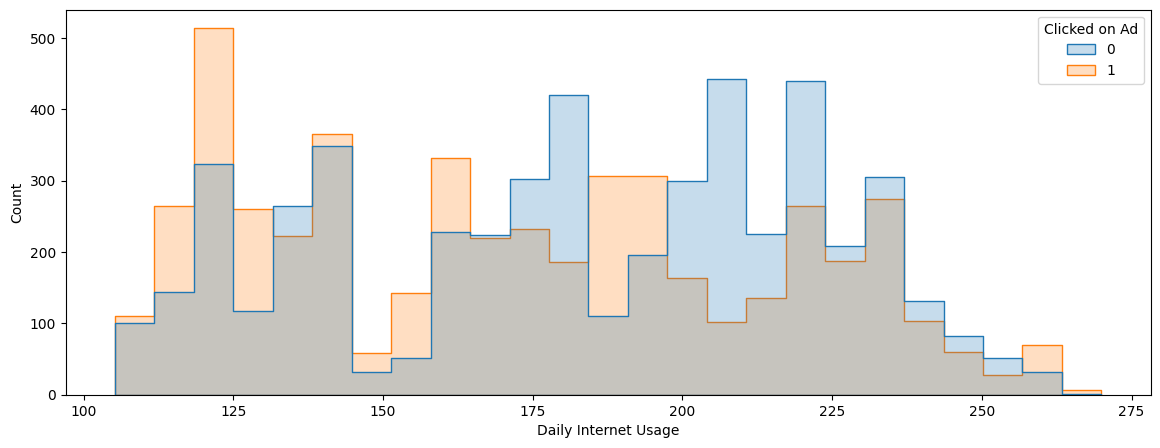

In [80]:
plt.figure(figsize=(14,5))
sns.histplot(ctr,x='Daily Internet Usage',hue='Clicked on Ad',element='step')

<Axes: xlabel='Age', ylabel='Count'>

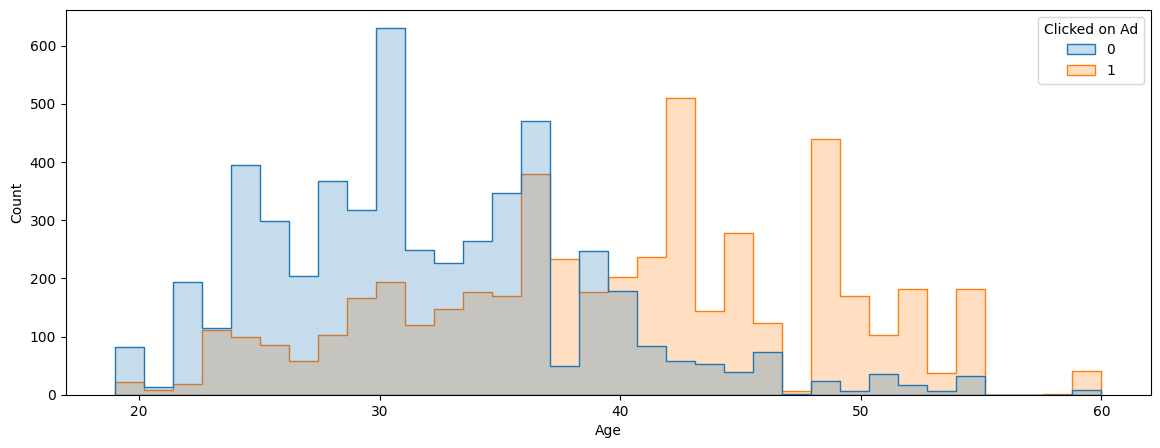

In [81]:
plt.figure(figsize=(14,5))
sns.histplot(ctr,x='Age',hue='Clicked on Ad',element='step')

Text(0.5, 1.0, 'Top Country Daily Time Spent on Site|')

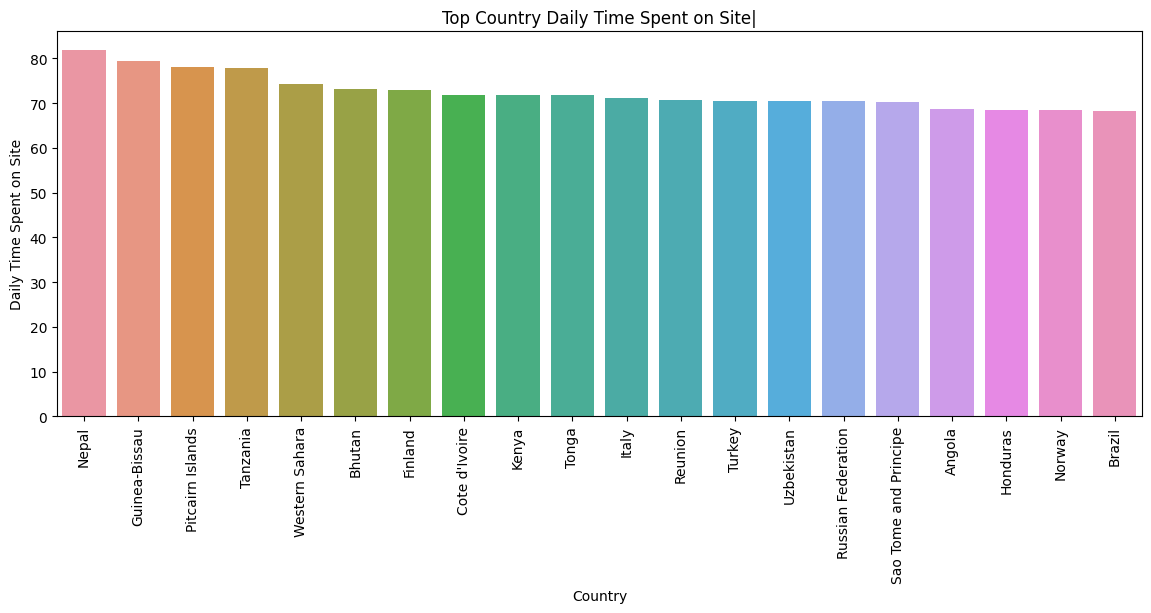

In [82]:
# Top Country daily time spend mean

city_time_spend=pd.DataFrame(ctr.groupby('Country')['Daily Time Spent on Site'].mean().sort_values(ascending=False))[0:20].reset_index(drop=False)
plt.figure(figsize=(14,5))
sns.barplot(city_time_spend,x='Country',y='Daily Time Spent on Site')
plt.xticks(rotation='vertical')
plt.ylabel('Daily Time Spent on Site')
plt.title('Top Country Daily Time Spent on Site|')

Text(0.5, 1.0, 'Top Country Area of Income')

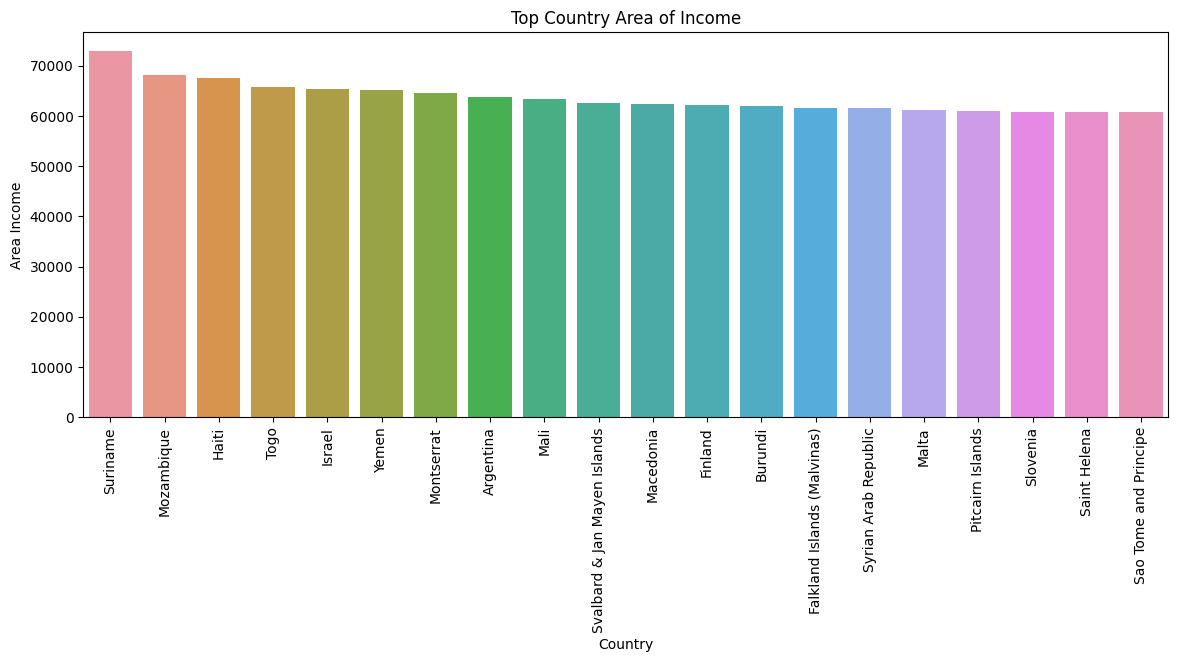

In [83]:
# top Country income
city_income=pd.DataFrame(ctr.groupby('Country')['Area Income'].mean().sort_values(ascending=False)[0:20].reset_index(drop=False))
plt.figure(figsize=(14,5))
sns.barplot(city_income,x='Country',y='Area Income')
plt.xticks(rotation='vertical')
plt.ylabel('Area Income')
plt.title('Top Country Area of Income')

Text(0.5, 1.0, 'each month Daily Time Spent on Site')

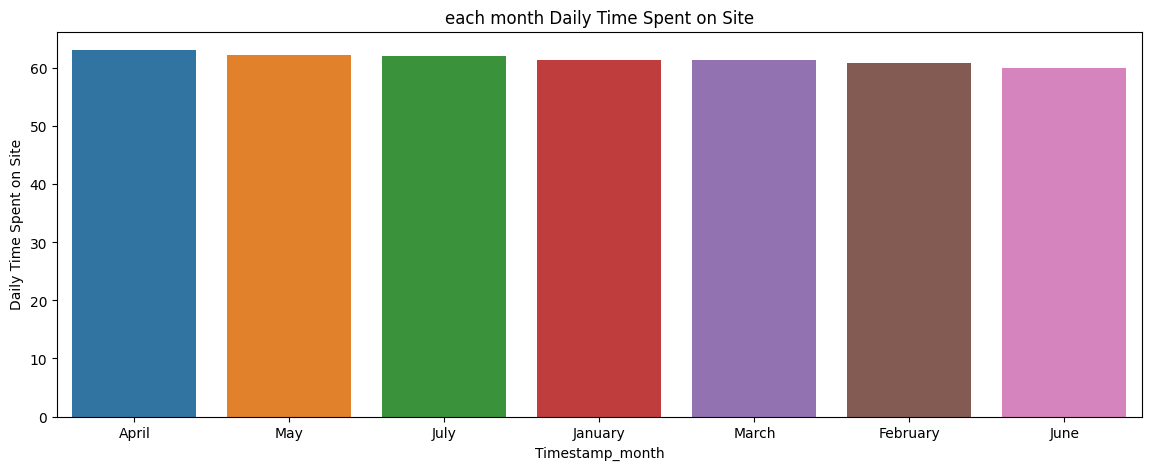

In [84]:
# each month Daily time spend on site mean
month_time=pd.DataFrame(ctr.groupby('Timestamp_month')['Daily Time Spent on Site'].mean().sort_values(ascending=False).reset_index(drop=False))
plt.figure(figsize=(14,5))
sns.barplot(month_time,x='Timestamp_month',y='Daily Time Spent on Site')
plt.ylabel('Daily Time Spent on Site')
plt.title('each month Daily Time Spent on Site')

Text(0.5, 1.0, 'each month Area Income')

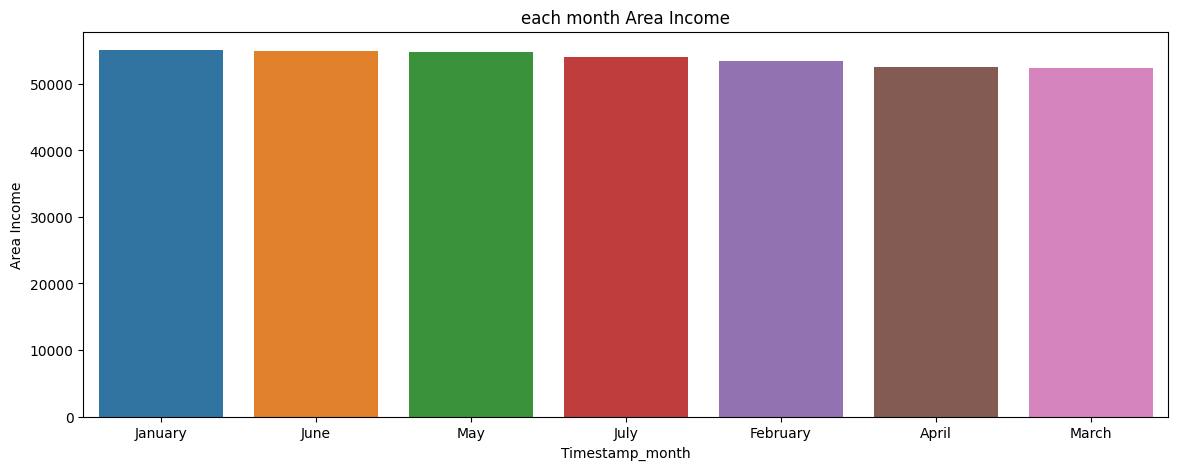

In [85]:
# each month area income mean

month_income=pd.DataFrame(ctr.groupby('Timestamp_month')['Area Income'].mean().sort_values(ascending=False).reset_index(drop=False))
plt.figure(figsize=(14,5))
sns.barplot(month_income,x='Timestamp_month',y='Area Income')

plt.ylabel('Area Income')
plt.title('each month Area Income')

In [86]:
ctr.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Timestamp_month,Timestamp_date,date
0,62.26,32,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:00,0,June,9,2016-06-09
1,41.73,31,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:00,0,January,16,2016-01-16
2,44.40,30,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:00,0,June,29,2016-06-29
3,59.88,28,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:00,0,June,21,2016-06-21
4,49.21,30,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:00,1,July,21,2016-07-21


<Axes: xlabel='Age', ylabel='Count'>

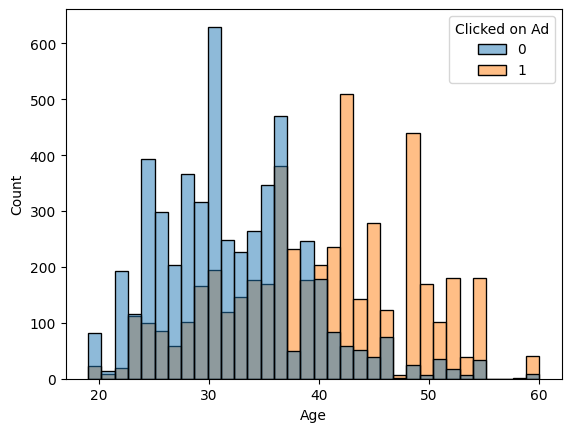

In [87]:
sns.histplot(data=ctr,x='Age',hue='Clicked on Ad')

In [88]:
ctr.groupby('Timestamp_month')['Clicked on Ad'].count().sort_values(ascending=False)

Timestamp_month
April       1734
January     1655
March       1502
July        1357
May         1311
February    1290
June        1151
Name: Clicked on Ad, dtype: int64

In [89]:
ctr.groupby('City')['Clicked on Ad'].count().sort_values(ascending=False)

City
Hubbardmouth         336
West Brandonton      275
Lisafort             261
Wintersfort          230
Stewartbury          207
                    ... 
East Troyhaven         1
South Ronald           1
South Pamela           1
Josephberg             1
South Christopher      1
Name: Clicked on Ad, Length: 521, dtype: int64

In [90]:
from scipy.stats import chi2_contingency

# Example assuming 'categorical_attribute' and 'target_variable' are column names
chi2, p_value, dof, ex = chi2_contingency(pd.crosstab(ctr['Timestamp_month'], ctr['Clicked on Ad']))
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. There is a significant association between Timestamp_month class and clicked on ad.")
else:
    print("\nWe fail to reject the null hypothesis. There is no significant association between Timestamp_month class and clicked on ad.")

Chi-square statistic: 486.848263331288
p-value: 5.721478774668841e-102

We reject the null hypothesis. There is a significant association between Timestamp_month class and clicked on ad.


In [91]:
pd.DataFrame(ctr.groupby('Country')['Clicked on Ad'].count().sort_values(ascending=False))

,Clicked on Ad
Country,
Australia,388
Czech Republic,330
Turkey,312
Qatar,224
Hong Kong,221
...,...
Monaco,1
Paraguay,1
Seychelles,1


- We have already seen that there are **207** unique countries in our Country attribute, and no single country is too dominant.

- A large number of unique elements will not allow a machine learning model to establish easily valuable relationships. For that reason, this variable will be excluded during training


In [92]:
pd.crosstab(ctr['Timestamp_month'],ctr['Clicked on Ad']).sort_values('Clicked on Ad',axis=1)

Clicked on Ad,0,1
Timestamp_month,,
April,563,1171
February,645,645
January,856,799
July,850,507
June,720,431
March,914,588
May,535,776


- we have already seen **7** unique values in timestamp_month attribute and every month too dominant.
- A small number of unique element will allow to make valuable relationship in machine learning model.for that reason,this attribute will be include during training


In [93]:
pd.crosstab(ctr['Gender'],ctr['Clicked on Ad'])

Clicked on Ad,0,1
Gender,,
Female,2609,2767
Male,2474,2150


- we have already seen **2** unique value in Gender attribute and all categories too dominant.
- A small number of unique element will make a valuable relationship in machine learning model, for that reason this attribute will include during training

In [94]:
pd.crosstab(ctr['City'],ctr['Clicked on Ad'])

Clicked on Ad,0,1
City,,
Alexanderfurt,2,5
Alexandrafort,1,0
Amandahaven,22,14
Amyfurt,9,8
Andersonfurt,1,0
...,...,...
Wrightburgh,182,0
Yangside,1,36
Youngburgh,3,1


- we have already seen **521** unique city in out data set and not sigle city not too dominant
- A large number of unique Categorie will not make valuable relationship in machine learning model.for that reason this attribute will excluded during trainig.


In [95]:
pd.crosstab(ctr['Timestamp_date'],ctr['Clicked on Ad'])

Clicked on Ad,0,1
Timestamp_date,,
1,49,90
2,102,16
3,483,321
4,65,367
5,223,329
6,129,289
7,121,37
8,445,195
9,300,194


- we have already seen **** unique categorie in timestamp_date attribute. every categorie not that much dominant as compare to Gender and Timestamp_month attribute
- A large number of unique categorie wull not make a valuable relationship in machine learning model. for that reason this attribute will exclude during training

<Axes: xlabel='Timestamp_date', ylabel='count'>

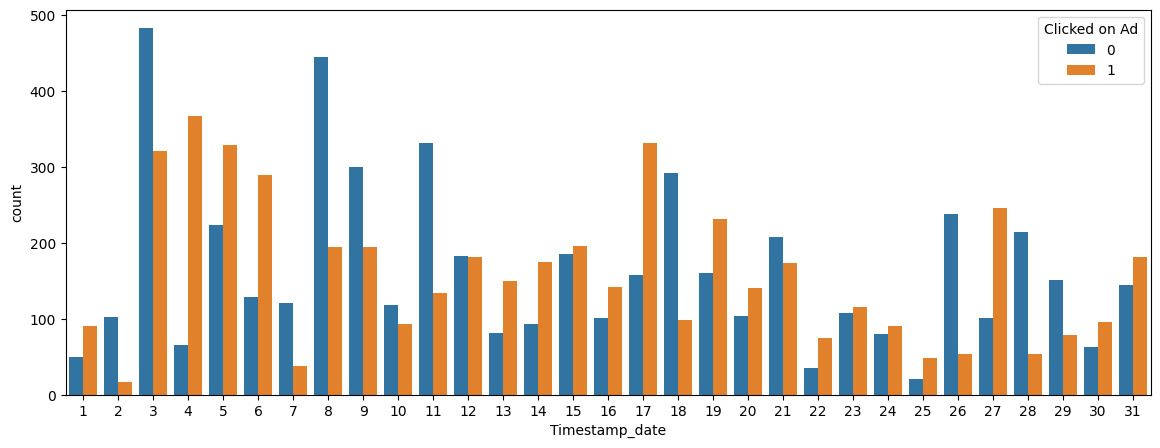

In [96]:
plt.figure(figsize=(14,5))
sns.countplot(data=ctr,x='Timestamp_date',hue='Clicked on Ad')

<Axes: xlabel='Timestamp_month', ylabel='count'>

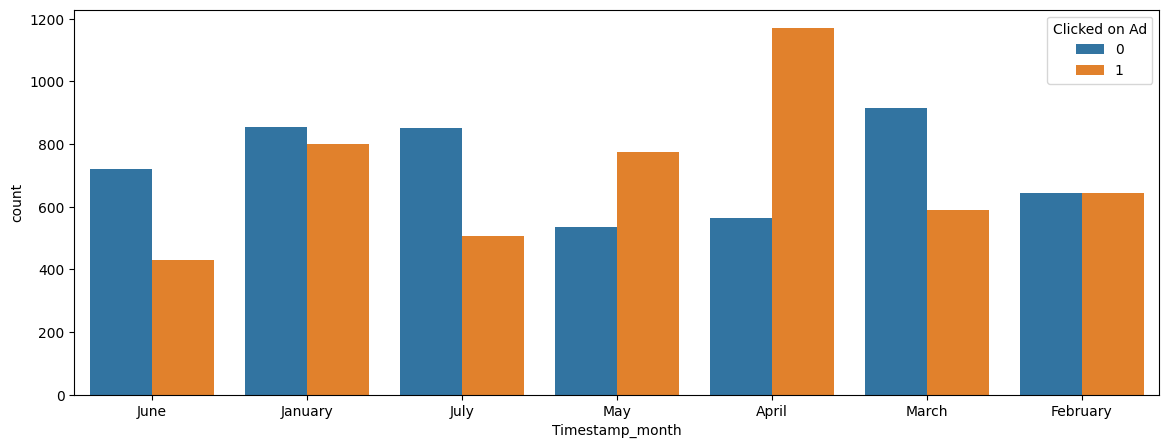

In [97]:
plt.figure(figsize=(14,5))
sns.countplot(ctr,x='Timestamp_month',hue='Clicked on Ad')

<Axes: xlabel='Gender', ylabel='count'>

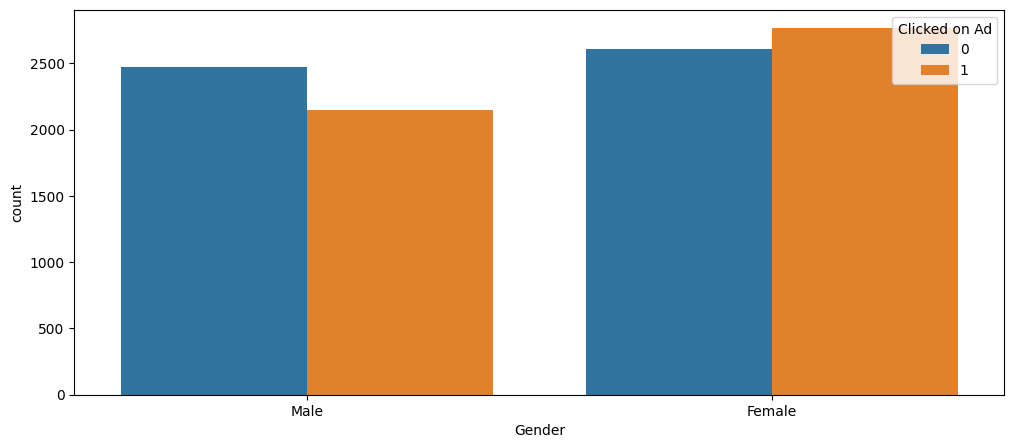

In [98]:
plt.figure(figsize=(12,5))
sns.countplot(ctr,x='Gender',hue='Clicked on Ad')

<Axes: xlabel='Timestamp_month', ylabel='count'>

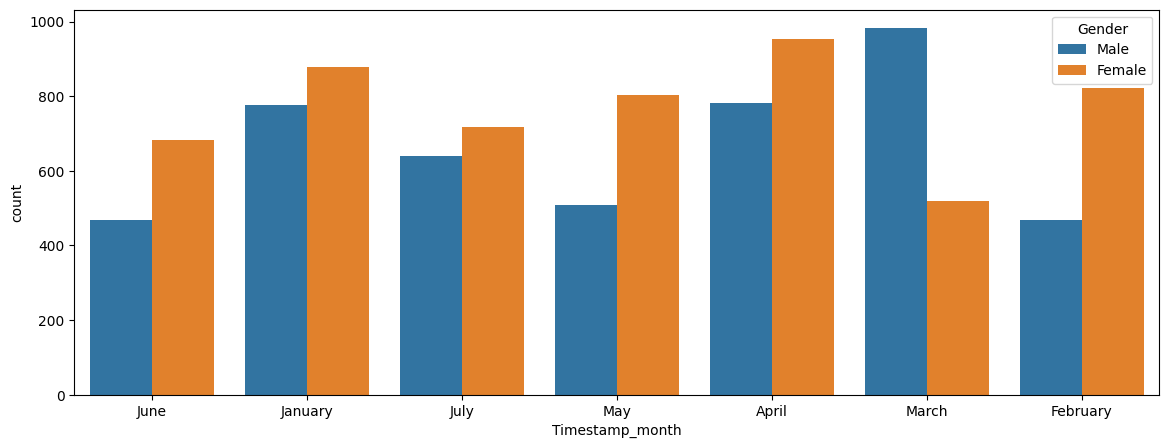

In [99]:
plt.figure(figsize=(14,5))
sns.countplot(ctr,x='Timestamp_month',hue='Gender')

In [100]:
ctr.drop(['City','Country','Timestamp','Timestamp_date','Ad Topic Line'],axis=1,inplace=True)

In [101]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  int32  
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Gender                    10000 non-null  object 
 5   Clicked on Ad             10000 non-null  int64  
 6   Timestamp_month           10000 non-null  object 
 7   date                      10000 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 586.1+ KB


Text(0.5, 1.0, 'Month and number of Clicks')

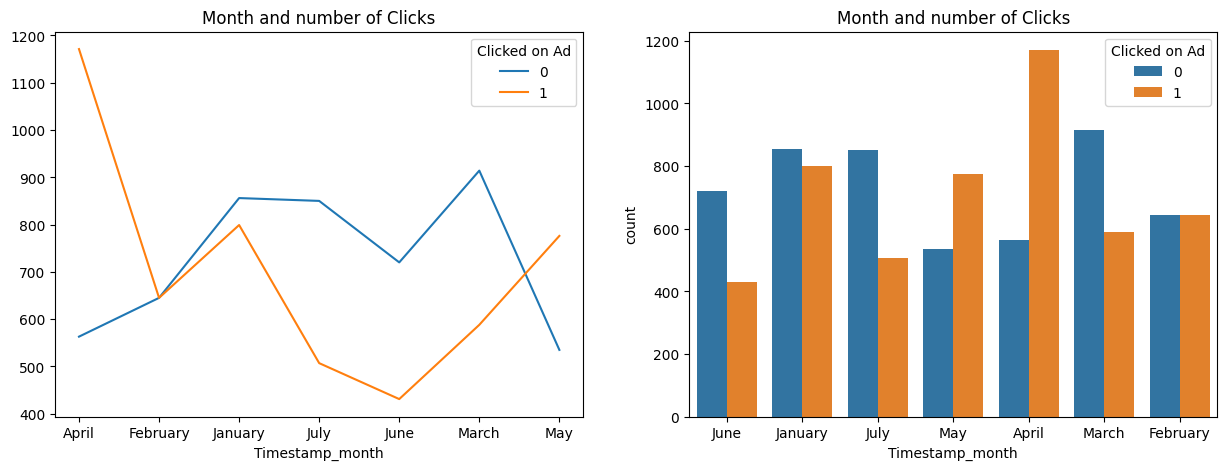

In [102]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
pd.crosstab(ctr['Timestamp_month'],ctr['Clicked on Ad']).plot(ax=ax[0])
sns.countplot(ctr,x='Timestamp_month',hue='Clicked on Ad')
ax[1].set_title('Month and number of Clicks')
ax[0].set_title('Month and number of Clicks')



Text(0.5, 1.0, 'user age group nuumber of clicked on ad')

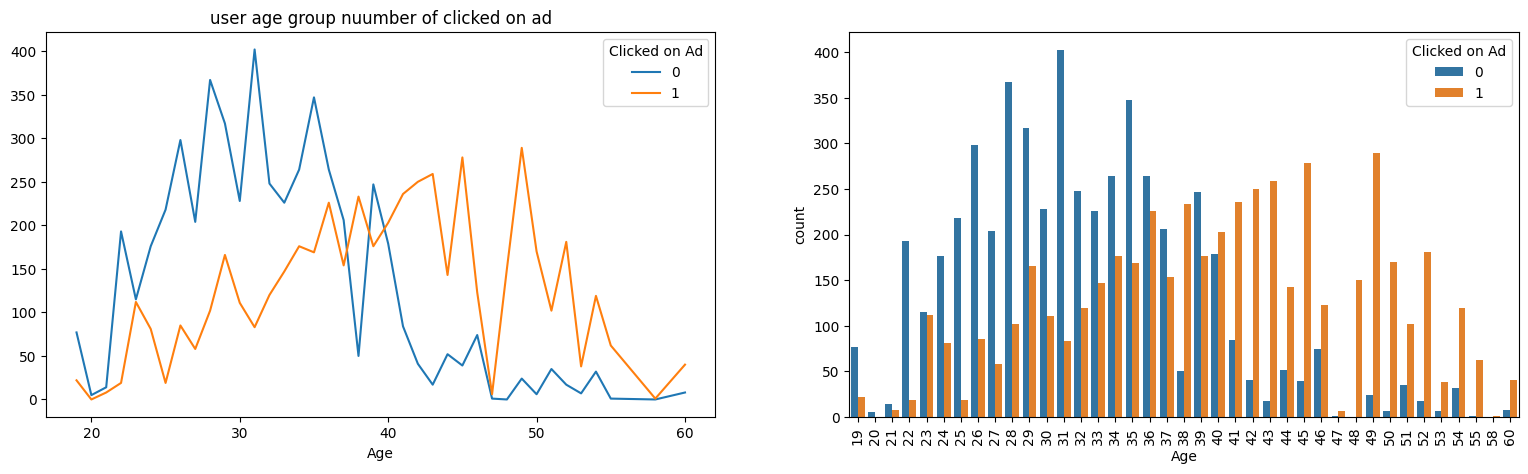

In [103]:
fig,ax=plt.subplots(1,2,figsize=(19,5))
pd.crosstab(ctr['Age'],ctr['Clicked on Ad']).plot(ax=ax[0])
sns.countplot(data=ctr,x='Age',hue='Clicked on Ad')
plt.xticks(rotation='vertical')
ax[0].set_title('user age group nuumber of clicked on ad')


In [104]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  int32  
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Gender                    10000 non-null  object 
 5   Clicked on Ad             10000 non-null  int64  
 6   Timestamp_month           10000 non-null  object 
 7   date                      10000 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 586.1+ KB


<Axes: xlabel='Gender', ylabel='Age'>

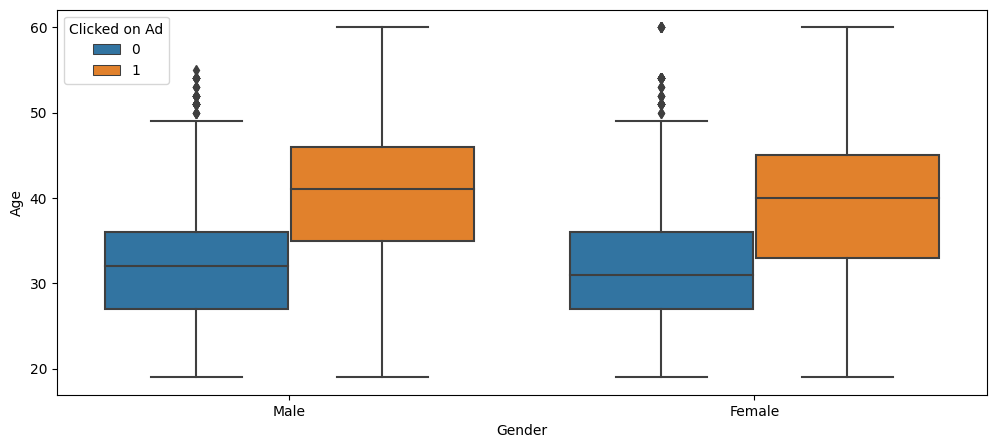

In [105]:
plt.figure(figsize=(12,5))
sns.boxplot(data=ctr,x='Gender',y='Age',hue='Clicked on Ad')

<Axes: xlabel='Timestamp_month', ylabel='Daily Internet Usage'>

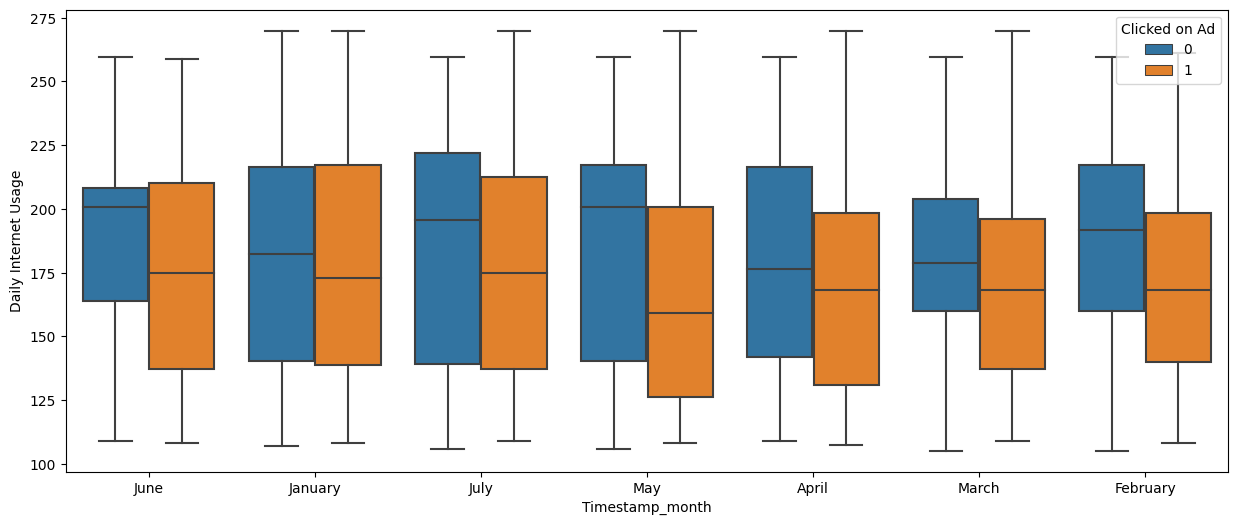

In [106]:
plt.figure(figsize=(15,6))

sns.boxplot(data=ctr,x='Timestamp_month',y='Daily Internet Usage',hue='Clicked on Ad')

<Axes: xlabel='Area Income'>

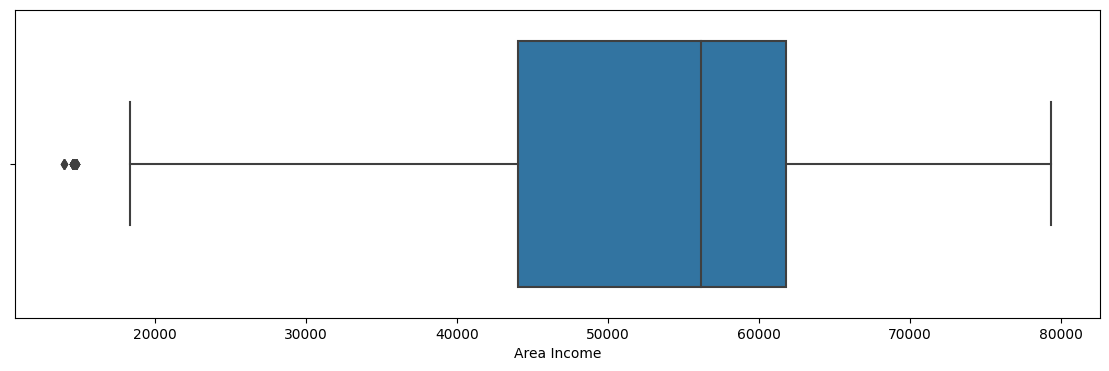

In [107]:
plt.figure(figsize=(14,4))
sns.boxplot(data=ctr,x='Area Income')

C:\Users\vagra\AppData\Local\Temp\ipykernel_14836\1994133546.py:2: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  ax=sns.kdeplot(data=ctr,x='Daily Time Spent on Site', y='Age', cmap="Reds", shade=True, shade_lowest=False)
C:\Users\vagra\AppData\Local\Temp\ipykernel_14836\1994133546.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(data=ctr,x='Daily Time Spent on Site', y='Age', cmap="Reds", shade=True, shade_lowest=False)
C:\Users\vagra\AppData\Local\Temp\ipykernel_14836\1994133546.py:3: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  ax=sns.kdeplot(data=ctr,x='Daily Internet Usage',y='Age',cmap='Blues',shade=True,shade_lowest=False)
C:\Users\v

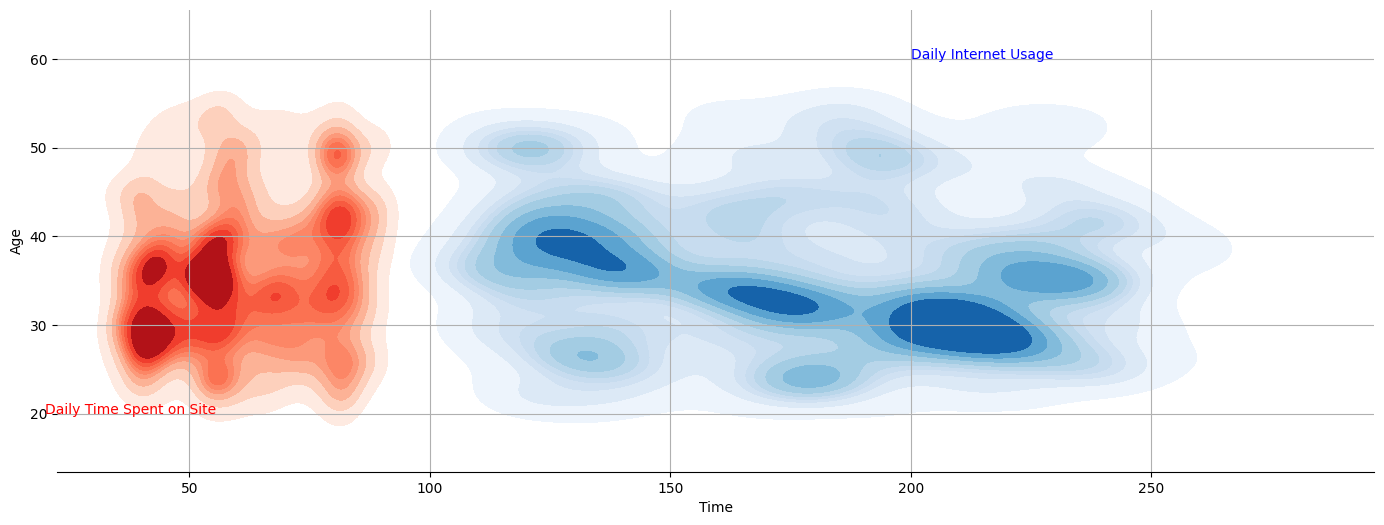

In [108]:
fig,ax=plt.subplots(figsize=(17,6))
ax=sns.kdeplot(data=ctr,x='Daily Time Spent on Site', y='Age', cmap="Reds", shade=True, shade_lowest=False)
ax=sns.kdeplot(data=ctr,x='Daily Internet Usage',y='Age',cmap='Blues',shade=True,shade_lowest=False)
ax.set_xlabel('Time')
ax.text(20,20,'Daily Time Spent on Site',size=10,color='r')
ax.text(200,60,'Daily Internet Usage',size=10,color='b')
sns.despine(left=True)
plt.grid()

- here we can see around 30 age group of user more spend on time website as well as more internet use 

C:\Users\vagra\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x500 with 0 Axes>

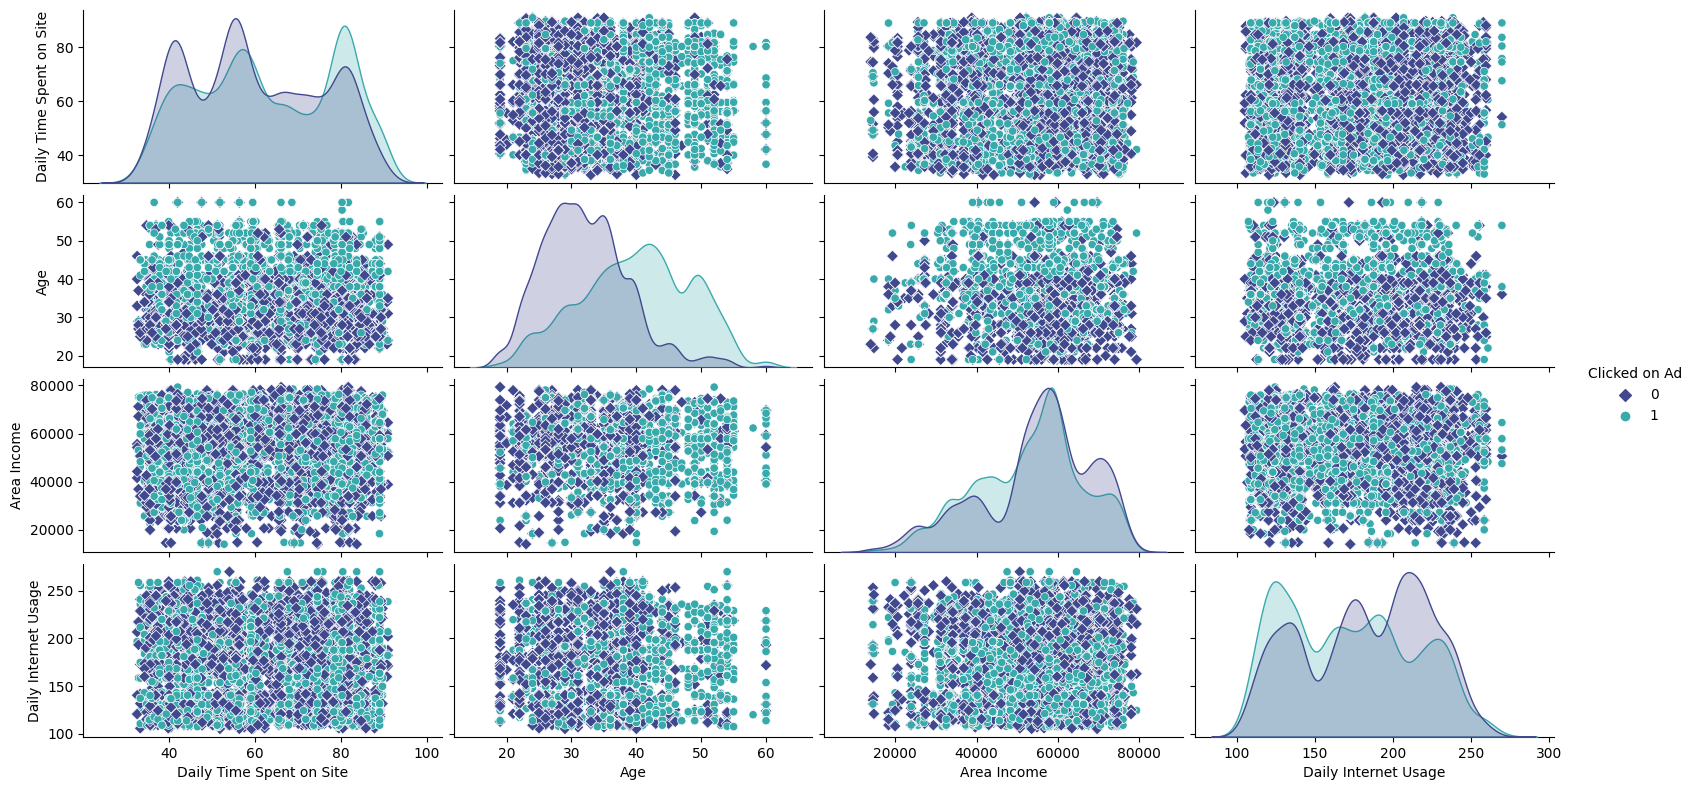

In [109]:
plt.figure(figsize=(15,5))
sns.pairplot(ctr,hue='Clicked on Ad', vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'], palette = 'mako',height = 2,aspect=2,markers=['D','o'])

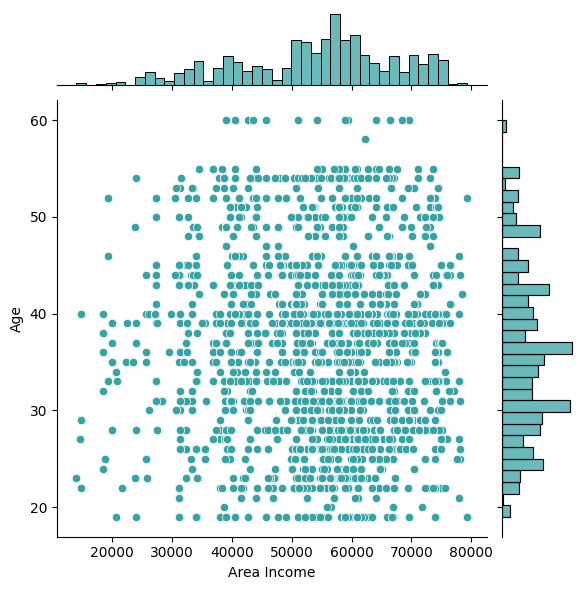

In [110]:
sns.jointplot(ctr,x='Area Income',y='Age',color='#38A3A5')

<Axes: xlabel='Daily Time Spent on Site', ylabel='Age'>

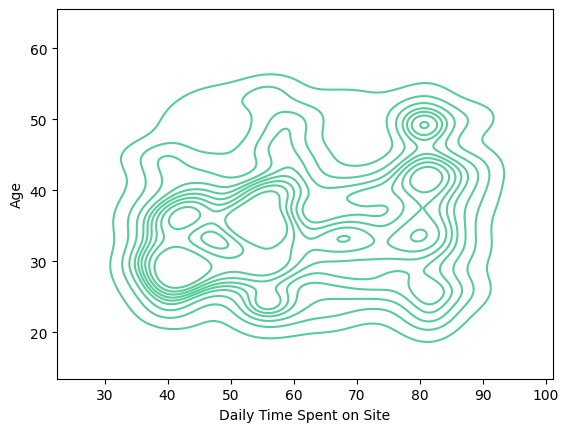

In [111]:
sns.kdeplot(ctr,x='Daily Time Spent on Site',y='Age',color='#57CC99')

In [112]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  int32  
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Gender                    10000 non-null  object 
 5   Clicked on Ad             10000 non-null  int64  
 6   Timestamp_month           10000 non-null  object 
 7   date                      10000 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 586.1+ KB


C:\Users\vagra\AppData\Local\Temp\ipykernel_14836\3665411305.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ctr[i],bins=20,color="#00203FFF")
C:\Users\vagra\AppData\Local\Temp\ipykernel_14836\3665411305.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ctr[i],bins=20,color="#00203FFF")
C:

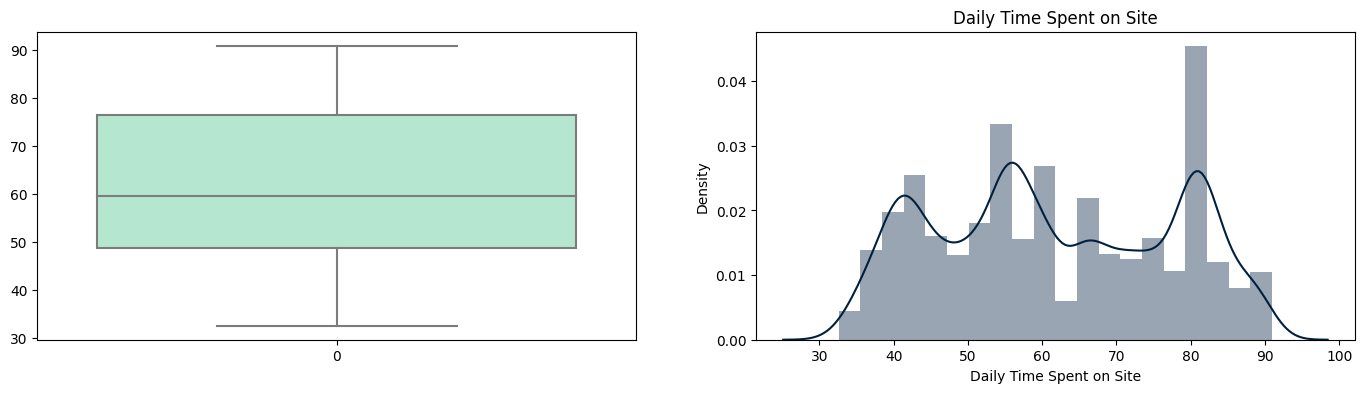

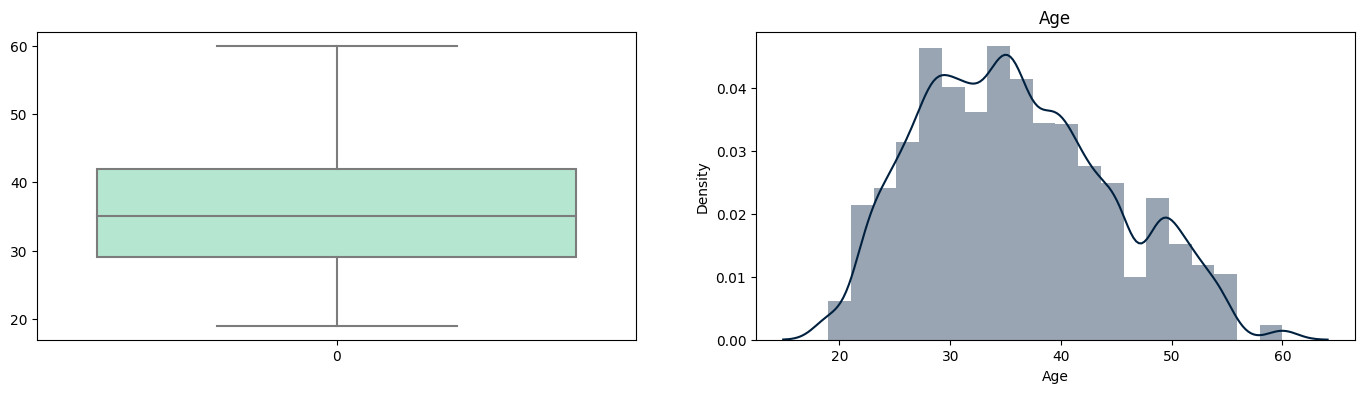

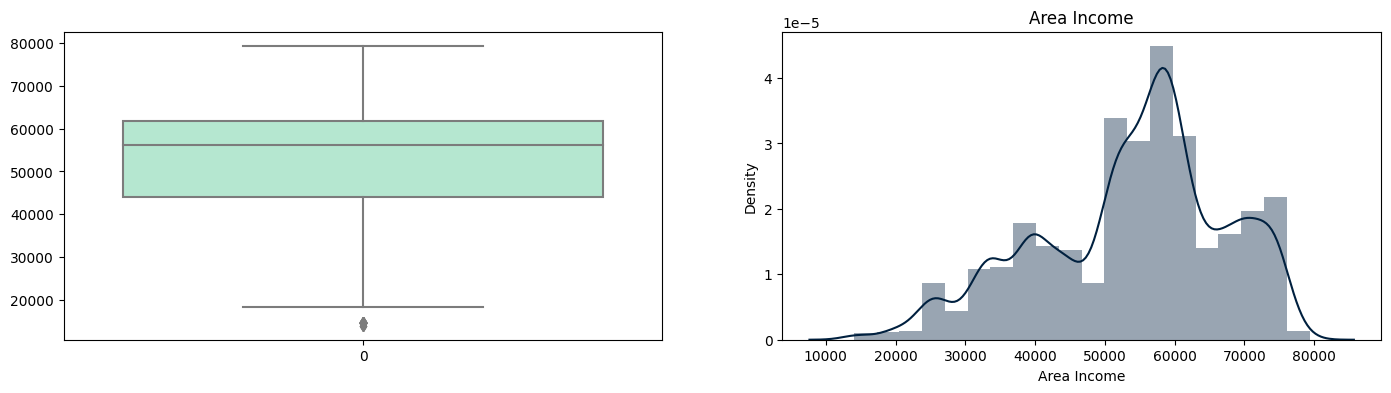

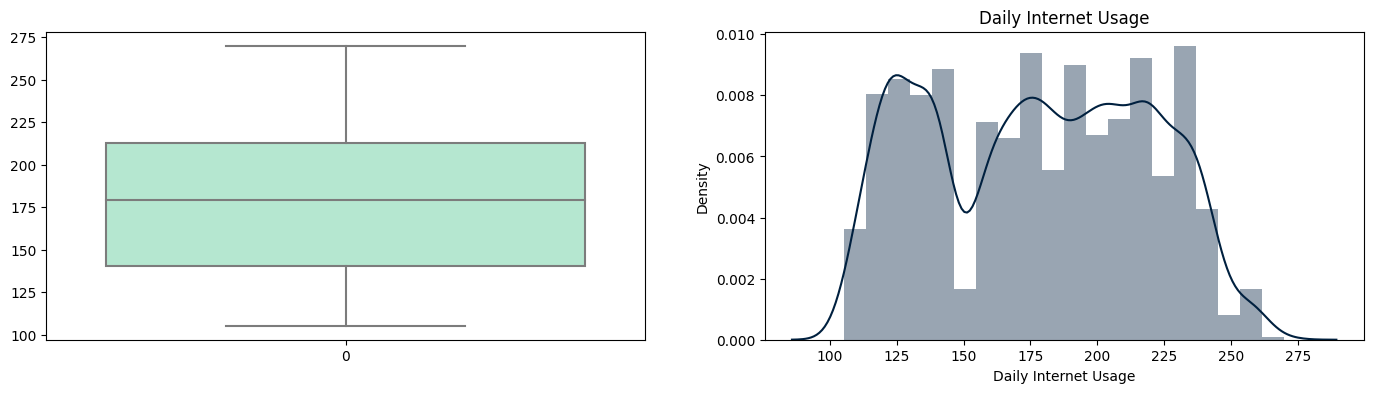

In [113]:
num_cat=['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']
for i in num_cat:
    plt.figure(figsize=(17,4))
    plt.subplot(1,2,1)
    sns.boxplot(ctr[i],color="#ADEFD1FF")
    plt.subplot(1,2,2)
    sns.distplot(ctr[i],bins=20,color="#00203FFF")
    plt.title(i)

In [114]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  int32  
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Gender                    10000 non-null  object 
 5   Clicked on Ad             10000 non-null  int64  
 6   Timestamp_month           10000 non-null  object 
 7   date                      10000 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 586.1+ KB


In [115]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
y=pd.DataFrame(oe.fit_transform(ctr[['Gender','Timestamp_month']]),dtype=int,columns=['Gender1','Timestamp_month1'])
# ctr=ctr.join(y,how='inner')




In [116]:
ctr=ctr.join(y,how='inner')

<Axes: >

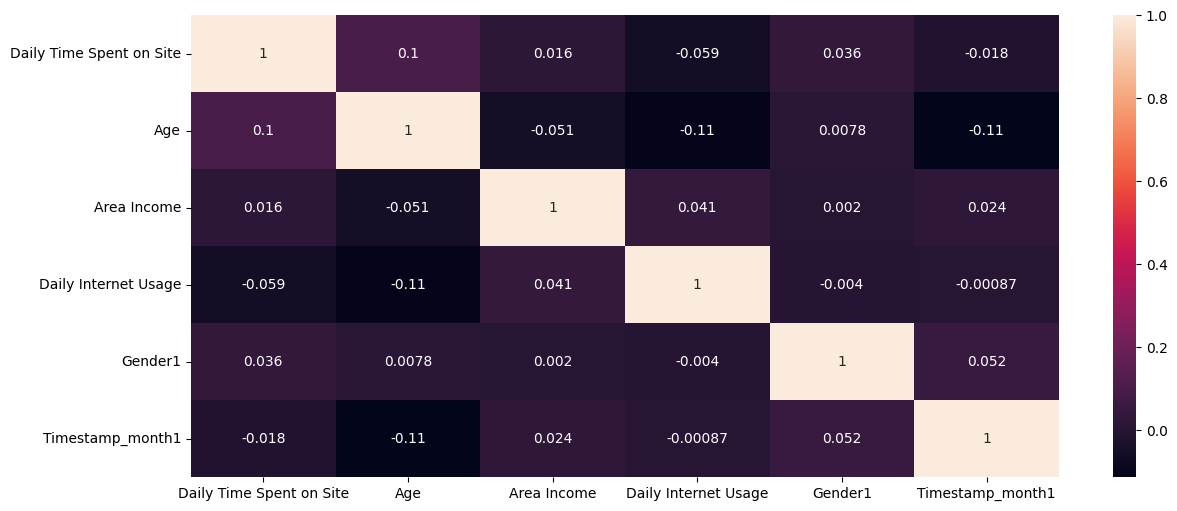

In [117]:
new =pd.DataFrame()
vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage','Gender1','Timestamp_month1']
for i in vars:
    new[i]=pd.DataFrame(ctr[i])

fig = plt.figure(figsize = (14,6))
sns.heatmap(new.corr(), annot = True) # Degree of relationship i.e correlation using heatmap

In [118]:
new.rename(columns={'Gender1':'Gender','Timestamp_month1':'Timestamp_month'},inplace=True)
new

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp_month
0,62.26,32,69481.85,172.83,1,4
1,41.73,31,61840.26,207.17,1,2
2,44.40,30,57877.15,172.83,0,4
3,59.88,28,56180.93,207.17,0,4
4,49.21,30,54324.73,201.58,0,3
...,...,...,...,...,...,...
9995,41.73,31,61840.26,207.17,1,2
9996,41.73,28,51501.38,120.49,1,6
9997,55.60,39,38067.08,124.44,0,2
9998,46.61,50,43974.49,123.13,0,0


In [119]:
exten_qual_cols = [
    'Daily Time Spent on Site', 'Age',
    'Area Income', 'Daily Internet Usage'
]
outliers_new=pd.DataFrame(columns=new.columns)
for col in exten_qual_cols:
    des=new[col].describe()
    print(des,'\n\n')
    IQR=des['75%']-des['25%']
    upper_limit=des['75%']+1.5*IQR
    lower_limit=des['25%']-1.5*IQR
    
    outliers=new[(new[col]>upper_limit) | (new[col]<lower_limit)]
    if not outliers.empty:
        print(f'outliers present in {col}')
        outliers_new=pd.concat([outliers_new,outliers])
    else:
        print(f'outliers not present in {col}')
    print(f'upper limit of {col} is {upper_limit}')
    print(f'lower limit of {col} is {lower_limit} \n\n\n')



    
  


count    10000.000000
mean        61.660757
std         15.704142
min         32.600000
25%         48.860000
50%         59.590000
75%         76.580000
max         90.970000
Name: Daily Time Spent on Site, dtype: float64 


outliers not present in Daily Time Spent on Site
upper limit of Daily Time Spent on Site is 118.16
lower limit of Daily Time Spent on Site is 7.280000000000001 



count    10000.000000
mean        35.940100
std          8.572973
min         19.000000
25%         29.000000
50%         35.000000
75%         42.000000
max         60.000000
Name: Age, dtype: float64 


outliers not present in Age
upper limit of Age is 61.5
lower limit of Age is 9.5 



count    10000.000000
mean     53840.047721
std      13343.708718
min      13996.500000
25%      44052.302500
50%      56180.930000
75%      61840.260000
max      79332.330000
Name: Area Income, dtype: float64 


outliers present in Area Income
upper limit of Area Income is 88522.19625000001
lower limit of Area Income 

- Area of income in outliers

In [120]:
ctr.drop(columns=['Gender','Timestamp_month'],inplace=True)

In [121]:
ctr.rename(columns={'Gender1':'Gender','Timestamp_month1':'Timestamp_month'},inplace=True)

10000

In [122]:
ctr.iloc[outliers_new.index]['Clicked on Ad'].value_counts()

Clicked on Ad
0    22
1    12
Name: count, dtype: int64

In [123]:
outliers_new

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp_month
171,40.47,27,14548.06,190.17,0,1
199,51.56,27,14548.06,193.29,1,5
388,49.21,27,14548.06,193.29,0,2
1583,49.21,27,14548.06,184.94,1,5
1716,83.16,27,14548.06,190.17,0,3
1961,39.30,27,14548.06,135.31,0,6
2122,66.79,29,14775.50,184.23,1,1
2771,74.59,23,13996.50,172.81,1,1
3160,69.15,27,14548.06,239.32,0,3
3595,51.56,27,14548.06,131.29,1,5


- this 43 people outliers in Area of income attribute
- these outliers show all people came from low income area
- unless the data source data of area income there is incorrectly or misunderstanding in how that variable was collected/created, there is no need to remove these.
- outliers in age 27 is more dominant to other age group
- outliers in gender attribute Female is more dominant



In [124]:
ctr.loc[outliers_new.index]['Age'].value_counts()

Age
27    22
22     7
23     3
29     1
40     1
Name: count, dtype: int64

In [125]:
outliers_new['Gender'].value_counts()

Gender
0    21
1    13
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

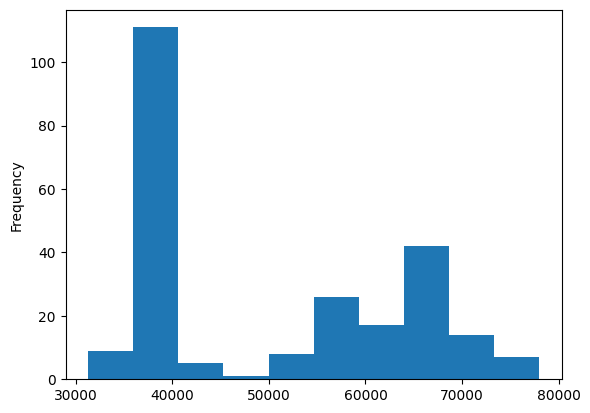

In [126]:
ctr[(ctr['Age']==27)&(ctr['Area Income']>16524.077499999992)]['Area Income'].plot(kind='hist')

In [139]:
hel=ctr.drop(index=outliers_new.index)

In [140]:
hel

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad,date,Gender,Timestamp_month
0,62.26,32,69481.85,172.83,0,2016-06-09,1,4
1,41.73,31,61840.26,207.17,0,2016-01-16,1,2
2,44.40,30,57877.15,172.83,0,2016-06-29,0,4
3,59.88,28,56180.93,207.17,0,2016-06-21,0,4
4,49.21,30,54324.73,201.58,1,2016-07-21,0,3
...,...,...,...,...,...,...,...,...
9995,41.73,31,61840.26,207.17,1,2016-01-03,1,2
9996,41.73,28,51501.38,120.49,0,2016-05-28,1,6
9997,55.60,39,38067.08,124.44,0,2016-01-05,0,2
9998,46.61,50,43974.49,123.13,1,2016-04-04,0,0


In [141]:
import scipy.stats as stats

((array([-3.80976748, -3.58456874, -3.46093108, ...,  3.46093108,
          3.58456874,  3.80976748]),
  array([105.22, 105.22, 105.22, ..., 269.96, 269.96, 269.96])),
 (39.949618446421475, 177.75033814970902, 0.978280984873157))

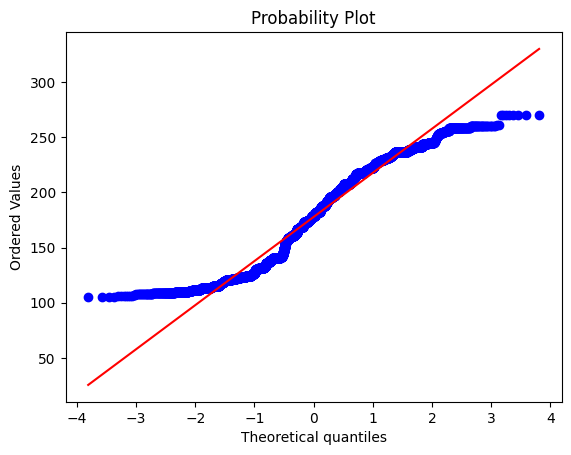

In [151]:
stats.probplot(hel['Daily Internet Usage'],dist='norm',plot=plt)

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([105.22, 105.22, 105.22, ..., 269.96, 269.96, 269.96])),
 (39.947481726190034, 177.75983100000002, 0.9783012329914224))

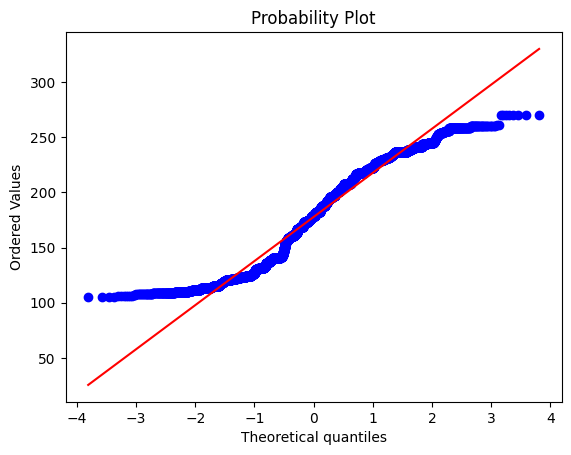

In [152]:
stats.probplot(ctr['Daily Internet Usage'],dist='norm',plot=plt)